# Summarizing metrics from single lines

Leanne Friedrich 08/02/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [156]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [27]:
ss,u = plainIm(os.path.join(cfg.path.fig, 'stillsSummary.csv'), ic=0)
ss = ss[ss.date>210500]
ss.date = ss.date.replace(210728, 210727)
# ss['ink_surfactant']=ss['ink_surfactant'].fillna('')
# ss['ink_type'] = [row['ink_base']+row['ink_surfactant'] for i,row in ss.iterrows()]

In [162]:
ss.date.unique()

array([210727., 210728., 210517., 210519., 210824., 210518., 210630.,
       210713.])

In [163]:
ss.ink_type.unique()

array(['water', 'mineral oil', 'mineral oil_Span 20', 'PDMS_3_mineral_25',
       'PDMS_3_silicone_25', 'PEGDA_40'], dtype=object)

In [185]:
ss.keys()

Index(['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio',
       'vRatio', 'ReRatio', 'rGrav', 'dEst', 'ink_shortname', 'ink_days',
       'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val',
       'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_v', 'ink_visc0',
       'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_rPR',
       'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant',
       'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0',
       'sup_eta0', 'sup_v', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv',
       'sup_OhInv', 'sup_rPR', 'xs_aspect', 'xs_xshift', 'xs_yshift',
       'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'xs_aspect_SE',
       'xs_xshift_SE', 'xs_yshift_SE', 'xs_areaN_SE', 'xs_wN_SE', 'xs_hN_SE',
       'xs_roughness_SE', 'vert_wN', 'vert_hN', 'vert_vN', 'vert_roughness',
       'vert_meanTN', 'vert_stdevTN', 'vert_minmaxTN', 'vert_wN_SE',
       'vert_hN_SE', 'vert_vN_SE', 'v

### cross-section

### aspect ratio

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dddbe2a788>)

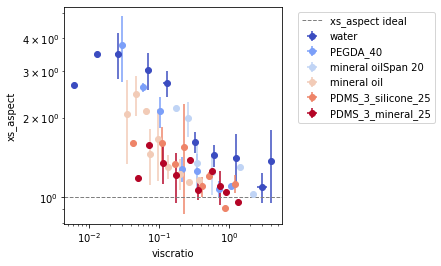

In [869]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1.sort_values(by='sigma')
mp.scatterSS(ss1, 'viscratio', 'xs_aspect', 'ink_type', logx=True, logy=True, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', yideal=1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12477cc69c8>)

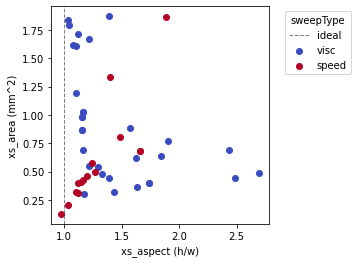

In [147]:
mp.scatterSS(ssmin, 'xs_aspect', 'xs_area', 'sweepType', logx=False, logy=False, gradColor=0, xideal=1, units=u, legend=True, dx=0, dy=0)

In [148]:
ssmin[(ssmin.xs_area>1.25)&(ssmin.date==210824)&(ssmin.sigma>0)][['bn', 'xs_aspect', 'ReRatio', 'xs_area']]

,bn,xs_aspect,ReRatio,xs_area
335,I_M6_S_3.00_VI_10_VS_2.5_210824,1.889309,76.441373,1.860734
154,I_M6_S_2.25_VI_5_VS_5_210824,1.040393,0.978946,1.793968
347,I_M6_S_3.00_VI_7.5_VS_2.5_210824,1.397807,48.880636,1.335283
158,I_M6_S_2.50_VI_5_VS_5_210824,1.102909,2.093372,1.606102


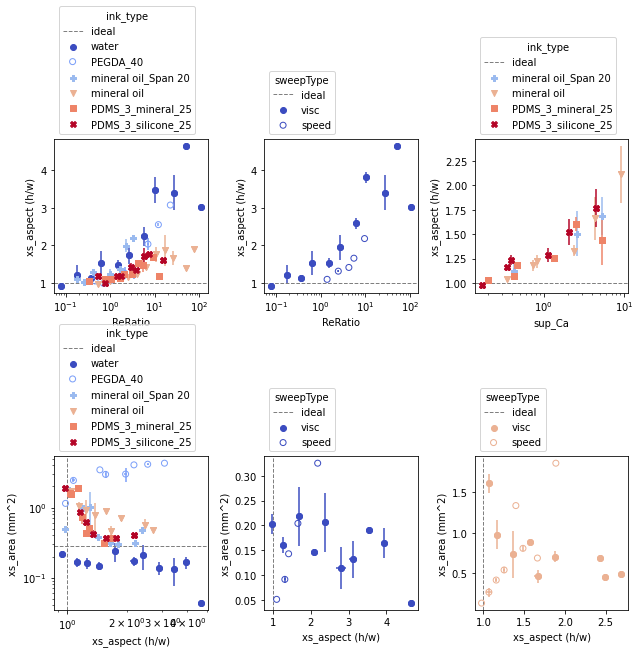

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [183]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0['sup_Ca']=1/ss0['sup_CaInv']
ss0['sweepType']=['speed' if ('I_2.75_S_2.75_VI' in i['bn'] or 'I_M6_S_3.00_VI' in i['bn']) else 'visc' for j,i in ss0.iterrows()]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
(ssca[ssca.sigma==0]).sup_Ca = [100000 for i in range(len(ssca[ssca.sigma==0]))]
ssmin = ss1[ss1.sigma==20]
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(2,3,figsize=(9,9))
mp.scatterSS(ss1, 'ReRatio', 'xs_aspect', 'ink_type', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0][0], units=u, legend=True)
mp.scatterSS(sslap, 'ReRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0][1], units=u, legend=True, color=cmap(0))
mp.scatterSS(ssca, 'sup_Ca', 'xs_aspect', 'ink_type', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0][2], units=u, legend=True)
ss0 = ss0[ss0.sweepType=='visc']
mp.scatterSS(ss0,'xs_aspect', 'xs_area',  'ink_type', logx=True, logy=True, gradColor=0, xideal=1, yideal=(np.pi*(cfg.const.di/2)**2), ax=axs[1][0], units=u, legend=True)
mp.scatterSS(sslap, 'xs_aspect', 'xs_area', 'sweepType', logx=False, logy=False, gradColor=0, xideal=1, ax=axs[1][1], units=u, legend=True, color=cmap(0))
mp.scatterSS(ssmin, 'xs_aspect', 'xs_area', 'sweepType', logx=False, logy=False, gradColor=0, xideal=1, ax=axs[1][2], units=u, legend=True, color=mp.adjust_lightness(cmap(3/5),0.9))
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect.svg'), bbox_inches='tight', dpi=300)

(<Figure size 432x288 with 0 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124780d7988>)

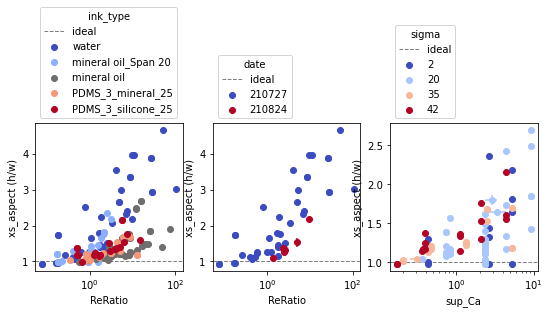

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [128]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0['sup_Ca']=1/ss0['sup_CaInv']
ss0 = ss0.sort_values(by='sigma')
ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
sslap = ss1[ss1.ink_base=='water']
ssca = ss1[ss1.sigma>0]
ssmin = ss1[ss1.sigma==20]

fig,axs = plt.subplots(1,3,figsize=(9,5))
mp.scatterSS(ss1, 'ReRatio', 'xs_aspect', 'ink_type', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0], units=u, legend=True, dx=0, dy=0)
mp.scatterSS(sslap, 'ReRatio', 'xs_aspect', 'date', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1], units=u, legend=True, dx=0, dy=0)
mp.scatterSS(ssca, 'sup_Ca', 'xs_aspect', 'sigma', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[2], units=u, legend=True, dx=0, dy=0)

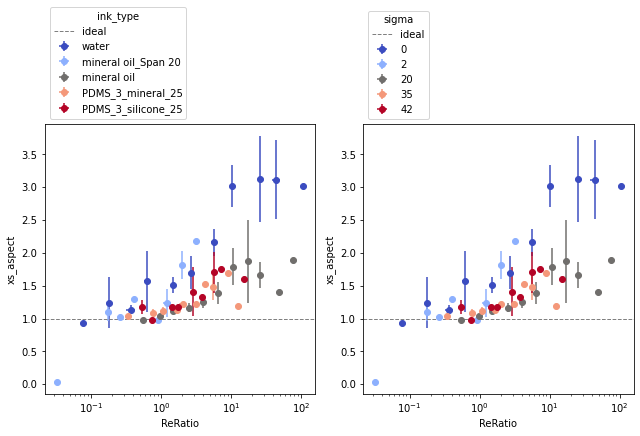

In [729]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_type!='PEGDA_40']
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
fig, axs = plt.subplots(1,2,figsize=(9,6))
for i,s in enumerate(['ink_type', 'sigma']):
    mp.scatterSS(ss1, 'ReRatio', 'xs_aspect', s, logx=True, logy=False, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', yideal=1, fig=fig,ax=axs[i])
fig.tight_layout()

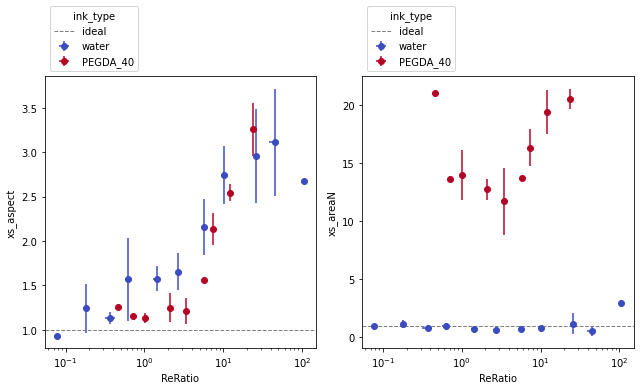

In [373]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma==0]
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
fig, axs = plt.subplots(1,2,figsize=(9,6))
for i,s in enumerate(['xs_aspect', 'xs_areaN']):
    mp.scatterSS(ss1, 'ReRatio', s, 'ink_type', logx=True, logy=False, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', yideal=1, fig=fig,ax=axs[i])
fig.tight_layout()

In [ ]:
ss1[ss1.ink_val]==13.5

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4e6a54f48>)

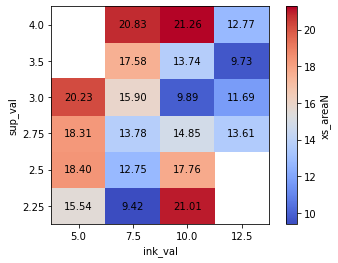

In [402]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_type=='PEGDA_40']
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
mp.colorMeshSS(ss1, 'ink_val', 'sup_val', 'xs_areaN', logx=False, logy=False, dx=0, dy=0, cmapname='coolwarm')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4e85001c8>)

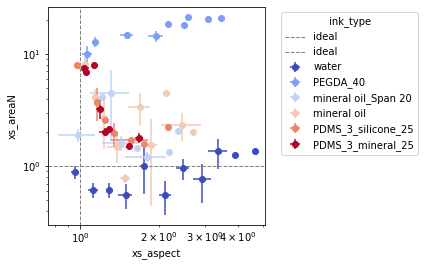

In [467]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<1]
# ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
mp.scatterSS(ss1, 'xs_aspect', 'xs_areaN', 'ink_type', logx=True, logy=True, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', xideal=1, yideal=1)

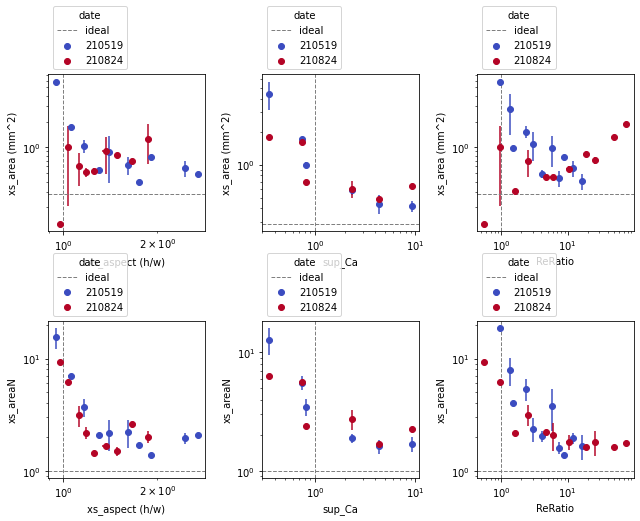

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [69]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.sigma==20]
# ss1 = ss1[ss1.xs_aspect_SE<1]
# ss1 = ss1[ss1.xs_aspect>0.5]
# ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
fig,axs = plt.subplots(2,3, figsize=(9,7))
for j,yvar in enumerate(['xs_area', 'xs_areaN']):
    for i, xvar in enumerate(['xs_aspect', 'sup_Ca', 'ReRatio']):
        mp.scatterSS(ss1, xvar, yvar, 'date', logx=True, logy=True, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', xideal=1, yideal=([(np.pi*(cfg.const.di/2)**2), 1][j]), ax=axs[j][i], units=u)
fig.tight_layout()

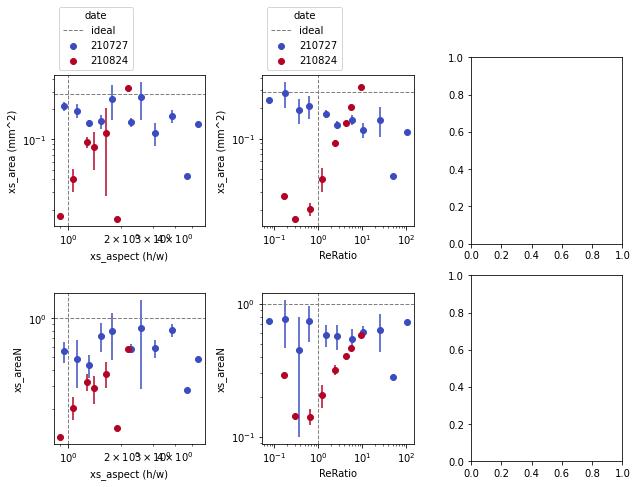

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [68]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.sigma==0]
# ss1 = ss1[ss1.xs_aspect_SE<1]
# ss1 = ss1[ss1.xs_aspect>0.5]
# ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.ink_base!='PEGDA_40']
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
fig,axs = plt.subplots(2,3, figsize=(9,7))
for j,yvar in enumerate(['xs_area', 'xs_areaN']):
    for i, xvar in enumerate(['xs_aspect', 'ReRatio']):
        mp.scatterSS(ss1, xvar, yvar, 'date', logx=True, logy=True, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', xideal=1, yideal=([(np.pi*(cfg.const.di/2)**2), 1][j]), ax=axs[j][i], legend=(j==0), units=u)
fig.tight_layout()

In [44]:
ss1[(ss1.sigma==0)&(ss1.xs_aspect<2)&(ss1.xs_aspect>1.5)&(ss1.xs_area<0.5)][['bn','xs_aspect','xs_area']]

,bn,xs_aspect,xs_area
325,I_2.75_S_2.75_VI_2.5_VS_10_210824,1.605556,0.027121
37,I_4.00_S_4.00_210727,1.762061,0.117993
327,I_2.75_S_2.75_VI_2.5_VS_7.5_210824,1.894758,0.016019
332,I_2.75_S_2.75_VI_7.5_VS_5_210824,1.654503,0.204027
14,I_2.75_S_2.75_210727,1.513220,0.131088
34,I_4.00_S_2.75_210727,1.733885,0.443287
12,I_2.75_S_2.25_210727,1.646749,0.196988
7,I_2.50_S_2.50_210727,1.794172,0.200080


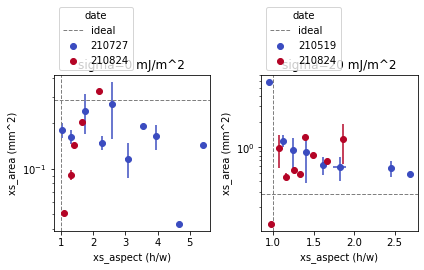

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [65]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_area>0.03]
ss1 = ss1[ss1.ink_base!='PEGDA_40']
# ss1 = ss1[ss1.xs_aspect_SE<1]
# ss1 = ss1[ss1.xs_aspect>0.5]
# ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
fig,axs = plt.subplots(1,2, figsize=(6,4))
for j,sigma in enumerate([0,20]):
    ss2 = ss1[ss1.sigma==sigma]
    mp.scatterSS(ss2, 'xs_aspect', 'xs_area', 'date', logx=False, logy=True, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', xideal=1, yideal=(np.pi*(cfg.const.di/2)**2), ax=axs[j], units=u)
    axs[j].set_title(f'sigma={sigma} mJ/m^2')
fig.tight_layout()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4fb071ac8>)

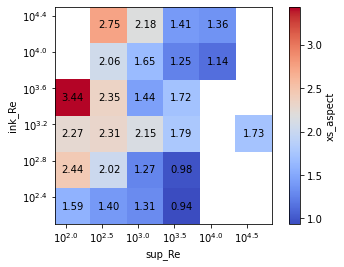

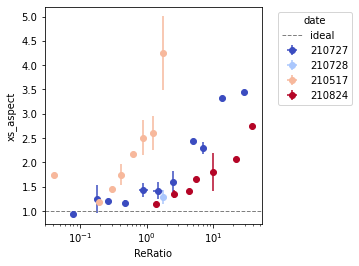

In [730]:
ss1 = ss.copy()
# ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.sigma==0]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
# ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1[ss1.ink_val>2.50]
mp.colorMeshSS(ss1, 'sup_Re', 'ink_Re', 'xs_aspect', logx=True, logy=True,  dx=0.2, dy=0.2, cmapname='coolwarm')
mp.scatterSS(ss1, 'ReRatio', 'xs_aspect', 'date', logx=True, logy=False, gradColor=False,  dx=0.1, dy=1, cmapname='coolwarm', yideal=1)

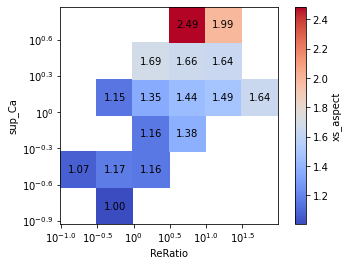

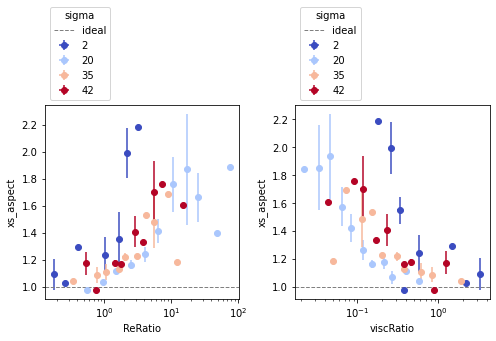

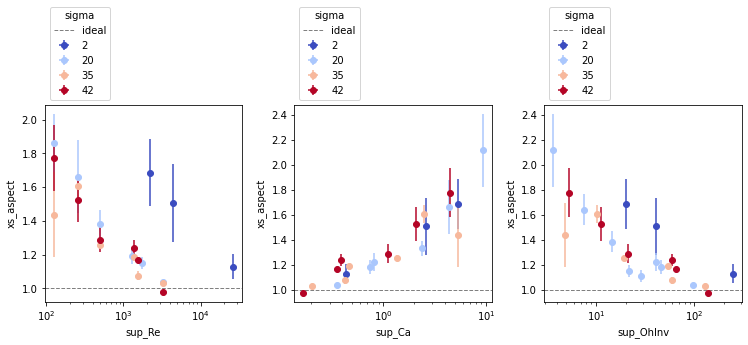

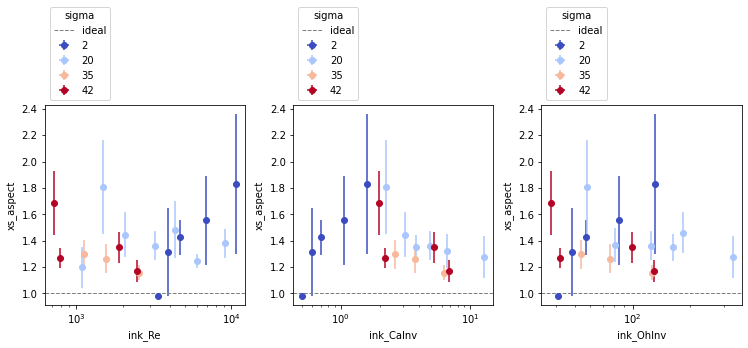

In [51]:
ss1 = ss.copy()
# ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.ink_type=='mineral oil']
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.xs_aspect>0.5]
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
mp.colorMeshSS(ss1, 'ReRatio', 'sup_Ca', 'xs_aspect', logx=True, logy=True,  dx=0.2, dy=0.2, cmapname='coolwarm')
for l in [['ReRatio', 'viscRatio'],['sup_Re', 'sup_Ca', 'sup_OhInv'],['ink_Re', 'ink_CaInv', 'ink_OhInv']]:
    fig,axs = plt.subplots(1,len(l), figsize=(3.5*len(l),5))
    for i,st in enumerate(l):
        mp.scatterSS(ss1, st, 'xs_aspect', 'sigma', logx=True, logy=False, gradColor=False,  dx=0.1, dy=1, cmapname='coolwarm', yideal=1,fig=fig, ax=axs[i])
    fig.tight_layout()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4e1a34248>)

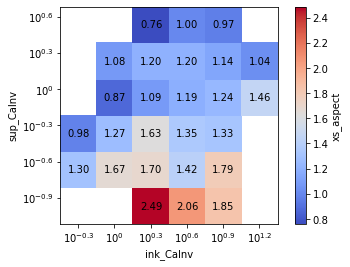

In [308]:
ss1 = ss.copy()
# ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.ink_type=='mineral oil']
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
# ss1 = ss1[ss1.xs_aspect>0.5]
mp.colorMeshSS(ss1, 'ink_CaInv', 'sup_CaInv', 'xs_aspect', logx=True, logy=True,  dx=0.2, dy=0.2, cmapname='coolwarm')

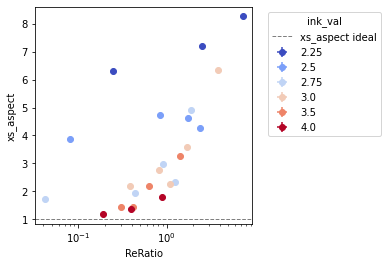

In [217]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==3]
ss1 = ss1[ss1.ink_base=='water']
# ss1 = ss1[ss1.xs_aspect_SE<0.5]
# ss1 = ss1[ss1.xs_aspect>0.5]
fig,ax = mp.scatterSS(ss1, 'ReRatio', 'xs_aspect', 'ink_val', logx=True, logy=False, gradColor=False,  dx=0, dy=1, cmapname='coolwarm', yideal=1)

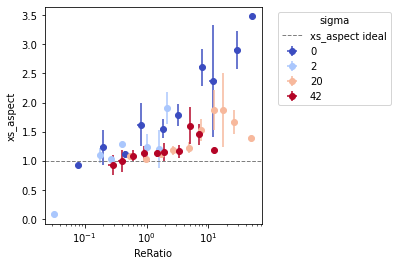

In [228]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.ink_base!='PEGDA_40']
ss1 = ss1[ss1.xs_aspect_SE<0.5]
# ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1.sort_values(by='sigma')
fig,ax = mp.scatterSS(ss1, 'ReRatio', 'xs_aspect', 'sigma', logx=True, logy=False, gradColor=False,  dx=0.1, dy=1, cmapname='coolwarm', yideal=1)

### area

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4d57baa88>)

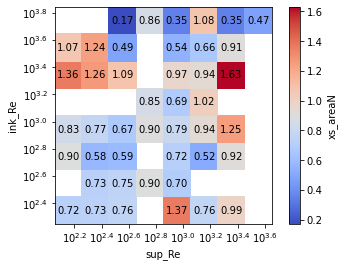

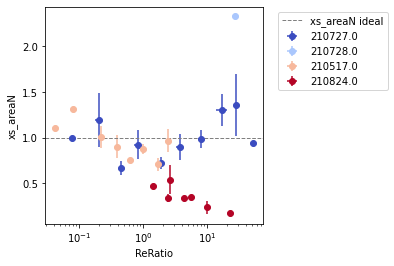

In [170]:
ss1 = ss.copy()
# ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.sigma==0]
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1['ReRatio'] = ss1['ink_Re']/ss1['sup_Re']
ss1['vratio'] = ss1['ink_v']/ss1['sup_v']
mp.colorMeshSS(ss1, 'sup_Re', 'ink_Re', 'xs_areaN', logx=True, logy=True,  dx=0.1, dy=0.1, cmapname='coolwarm')
mp.scatterSS(ss1, 'ReRatio', 'xs_areaN', 'date', logx=True, logy=False, gradColor=False,  dx=0.1, dy=1, cmapname='coolwarm', yideal=1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dddf326d08>)

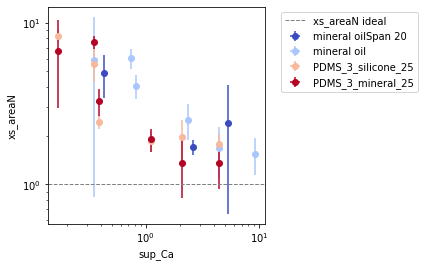

In [886]:
ss1 = ss.copy()
ss1 = ss1[ss1.calibFile]
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.sigma>0]
# ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
mp.scatterSS(ss1, 'sup_Ca', 'xs_areaN', 'ink_type', logx=True, logy=True, gradColor=False, dx=0, dy=1, cmapname='coolwarm', yideal=1)

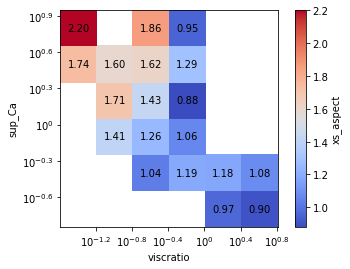

In [890]:
ss1 = ss.copy()
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
# ss1 = ss1[ss1.sup_CaInv<12]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
# ss1 = ss1[ss1.ink_base=='mineral oil']
# fig,ax = mp.scatterSS(ss1, 'viscratio', 'sup_Ca','xs_aspect',logx=True, logy=True, gradColor=True, dx = 0, dy=0)
fig,ax = mp.colorMeshSS(ss1, 'viscratio', 'sup_Ca', 'xs_aspect', logx=True, logy=True, dx=0.18, dy=0.18)

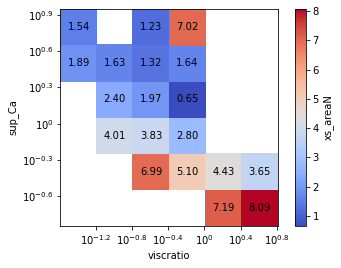

In [891]:
ss1 = ss.copy()
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
# ss1 = ss1[ss1.sup_CaInv<12]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
# ss1 = ss1[ss1.ink_base=='mineral oil']
# fig,ax = mp.scatterSS(ss1, 'viscratio', 'sup_Ca','xs_aspect',logx=True, logy=True, gradColor=True, dx = 0, dy=0)
fig,ax = mp.colorMeshSS(ss1, 'viscratio', 'sup_Ca', 'xs_areaN', logx=True, logy=True, dx=0.18, dy=0.18)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ddd338bfc8>)

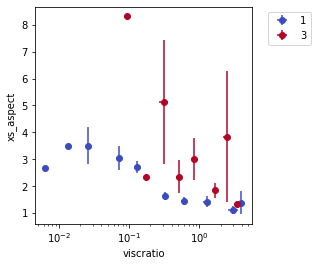

In [706]:
ss1 = ss.copy()
ss1 = ss[ss.calibFile]
ss1.date = [float(i[0:6]) for i in ss1.date]
ss1 = ss1[ss1.date>210516]
ss1 = ss1[ss1.ink_base=='water']
mp.scatterSS(ss1, 'viscratio', 'xs_aspect', 'ink_days', logx=True, logy=False, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm')

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ddcf8c0cc8>)

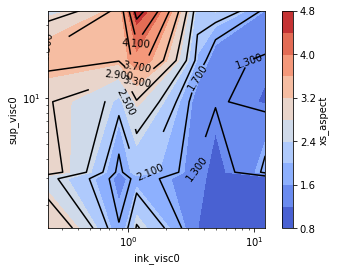

In [741]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_base=='water']
mp.contourSS(ss1, 'ink_visc0', 'sup_visc0', 'xs_aspect', logx=True, logy=True)

### yshift

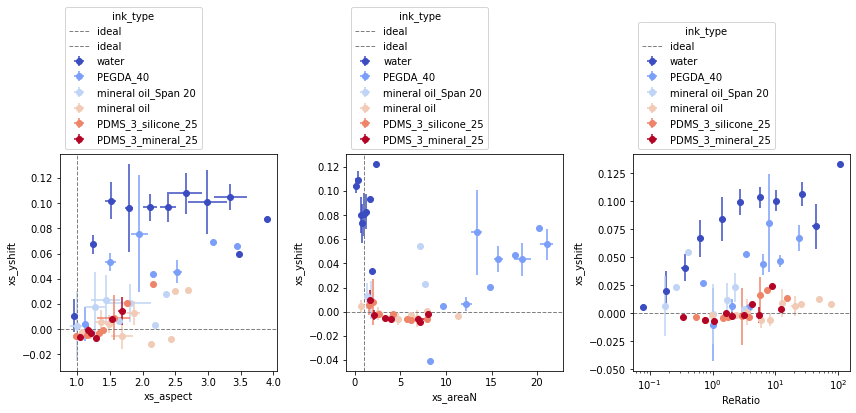

In [470]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1[ss1.xs_yshift_SE<0.05]
ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,3,figsize=(12,6))
for i,s in enumerate(['xs_aspect', 'xs_areaN','ReRatio']):
    kwargs = {'logx':(i>1), 'logy':False, 'gradColor':False,\
              'dx':0.1, 'dy':1, 'cmapname':'coolwarm', \
              'yideal':0, 'ax':axs[i], 'fig':fig}
    if i<2:
        kwargs['xideal']=1
    mp.scatterSS(ss1, s, 'xs_yshift', 'ink_type', **kwargs)
fig.tight_layout()

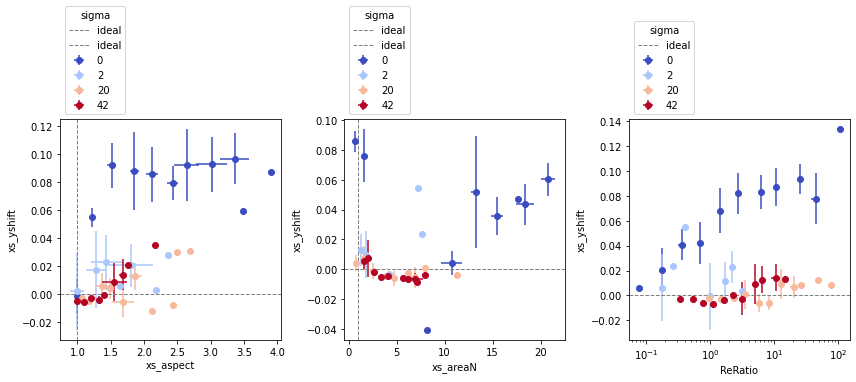

In [489]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1[ss1.xs_yshift_SE<0.05]
ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,3,figsize=(12,6))
for i,s in enumerate(['xs_aspect', 'xs_areaN','ReRatio']):
    kwargs = {'logx':(i>1), 'logy':False, 'gradColor':False,\
              'dx':0.1, 'dy':1, 'cmapname':'coolwarm', \
              'yideal':0, 'ax':axs[i], 'fig':fig}
    if i<2:
        kwargs['xideal']=1
    mp.scatterSS(ss1, s, 'xs_yshift', 'sigma', **kwargs)
fig.tight_layout()

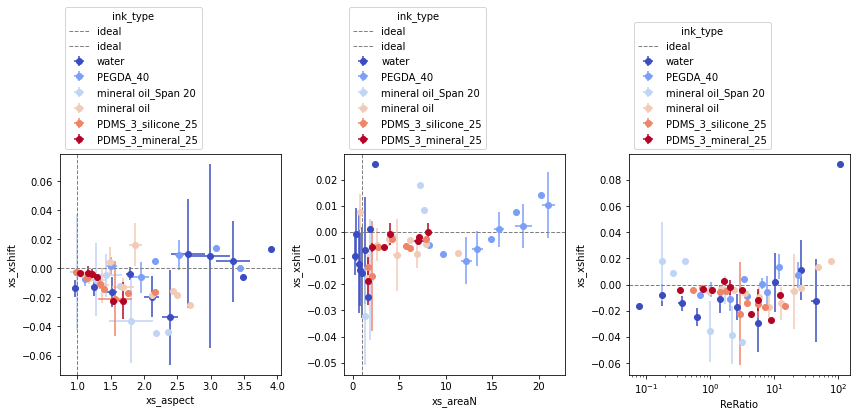

In [468]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1[ss1.xs_yshift_SE<0.05]
ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,3,figsize=(12,6))
for i,s in enumerate(['xs_aspect', 'xs_areaN','ReRatio']):
    kwargs = {'logx':(i>1), 'logy':False, 'gradColor':False,\
              'dx':0.1, 'dy':1, 'cmapname':'coolwarm', \
              'yideal':0, 'ax':axs[i], 'fig':fig}
    if i<2:
        kwargs['xideal']=1
    mp.scatterSS(ss1, s, 'xs_xshift', 'ink_type', **kwargs)
fig.tight_layout()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4ea8f7d48>)

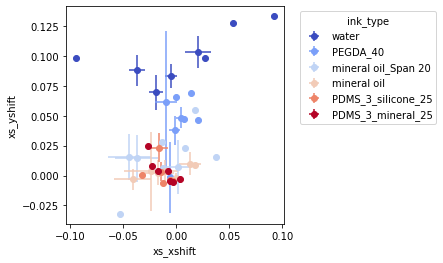

In [472]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1[ss1.xs_yshift_SE<0.05]
ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
mp.scatterSS(ss1, 'xs_xshift', 'xs_yshift', 'ink_type')

In [460]:
ss[(ss.ink_type=='PDMS_3_mineral_25')&(ss.xs_aspect<1)&(ss.xs_yshift<1)][['bn', 'xs_areaN', 'xs_yshift', 'xs_aspect']]

,bn,xs_areaN,xs_yshift,xs_aspect
274,I_PDMSM12.5_S_3.00_210630,1.371098,0.011839,0.867871
275,I_PDMSM12.5_S_3.50_210630,0.675217,-0.004263,0.880221
276,I_PDMSM12.5_S_4.00_210630,0.674329,-0.007345,0.869414
281,I_PDMSM7.5_S_2.25_210630,5.681467,0.011418,0.960331
